In [31]:
using Random
using Plots
using LinearAlgebra

In [32]:
param_2D = Dict{String,Any}()
param_2D["n_plac"]= 100
param_2D["temperature"] = 0.001
param_2D["lenght"] = 0.001
param_2D["d_rest"] = [0.01, 0.02]
param_2D["elasticity"] = [1., 1.]
param_2D["step"]= 0.05 * [0.1, 0.1, 0.1]
param_2D

Dict{String,Any} with 6 entries:
  "step"        => [0.005, 0.005, 0.005]
  "elasticity"  => [1.0, 1.0]
  "lenght"      => 0.001
  "n_plac"      => 100
  "temperature" => 0.001
  "d_rest"      => [0.01, 0.02]

In [33]:
function energy_2D(x, y, param_2D) 
    link = fill(0., 4)
    d_rest_3 = sqrt(param_2D["lenght"]^2 + param_2D["d_rest"][1] * param_2D["d_rest"][2])
    
    link[1] = sqrt(sum( (x[1:2] - y[1:2] + param_2D["lenght"] *([cospi(x[3]), sinpi(x[3])] - [cospi(y[3]), sinpi(y[3])])).^2))
    link[2] = sqrt(sum( (x[1:2] - y[1:2]).^2))
    link[3] = sqrt(sum( (x[1:2] - y[1:2] + param_2D["lenght"] *([cospi(x[3]), sinpi(x[3])])).^2))
    link[4] = sqrt(sum( (x[1:2] - y[1:2] + param_2D["lenght"] *(- [cospi(y[3]), sinpi(y[3])])).^2))
    #energy_1 = param_2D["elasticity"][1]*link[1] - param_2D["d_rest"][1])^2
    #energy_2 = param_2D["elasticity"][2]*link[2] - param_2D["d_rest"][2])^2
    energy = (link - [param_2D["d_rest"][1], param_2D["d_rest"][2], d_rest_3, d_rest_3]).^2
    return sum(energy)
end

energy_2D (generic function with 1 method)

In [34]:
elem = 4
sum((chain[elem,1:2] - chain[elem + 1,1:2] ).*( chain[elem,1:2] -chain[elem-1,1:2] )) 

0.11204376331886962

In [102]:
function element_progress_2D(chain, elem, param_2D)
    energy_before = energy_2D(chain[elem,:], chain[elem-1,:], param_2D) + energy_2D(chain[elem,:], chain[elem+1,:], param_2D)
    var = (rand(3).-0.5).*param_2D["step"]
    energy_after = energy_2D(chain[elem,:] + var, chain[elem-1,:], param_2D) + energy_2D(chain[elem,:] + var, chain[elem+1,:], param_2D)
    delta_energy = energy_after - energy_before
    #=
    if sum((chain[elem,1:2] - chain[elem + 1,1:2] ).*( chain[elem,1:2] -chain[elem-1,1:2] )) > 0
        delta_energy -= 0.5 * param_2D["temperature"]
    end
    if sum((chain[elem,1:2] + var[1:2] - chain[elem + 1,1:2] ).*( chain[elem,1:2] +var[1:2] -chain[elem-1,1:2] )) > 0
        delta_energy += 0.5 * param_2D["temperature"]
    end
    =#
    if delta_energy < 0. || rand() < exp(- delta_energy/param_2D["temperature"])
        chain[elem, :] += var
    #else println("non ho cambiato")
    end
end

element_progress_2D (generic function with 1 method)

In [36]:
chain = fill(0., param_2D["n_plac"], 3)
chain[1,3] = 0.5
chain[param_2D["n_plac"],:] = [1, 0, 0.5]
for j = 1:1000
    for i = 2:(param_2D["n_plac"]-1)
        element_progress_2D(chain, i, param_2D)
    end
end

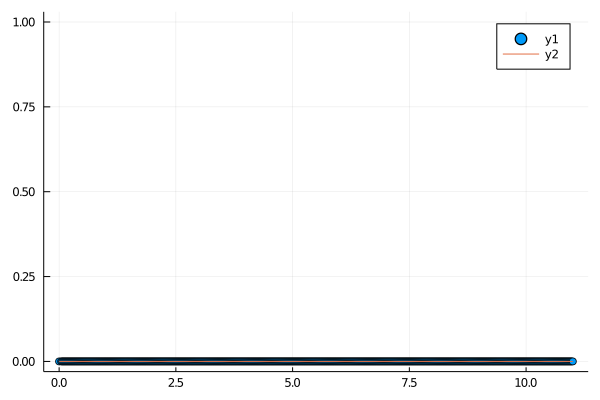

In [103]:
param_2D["n_plac"]= 500
chain = fill(0., param_2D["n_plac"], 3)
chain[1,3] = 0.5
vf = 11.
chain[param_2D["n_plac"],:] = [vf, 0, 0.5]
for i = 2:(param_2D["n_plac"]-1)
    chain[i, 1] = i*vf/ param_2D["n_plac"]
    #chain[i, 1] = i*vf/ param_2D["n_plac"]#+ cospi(i*vf/ param_2D["n_plac"]) -1
    #chain[i, 2] = sinpi(i*vf/ param_2D["n_plac"])
end
scatter(chain[:,1], chain[:, 2])
plot!(chain[:,1], chain[:, 2])

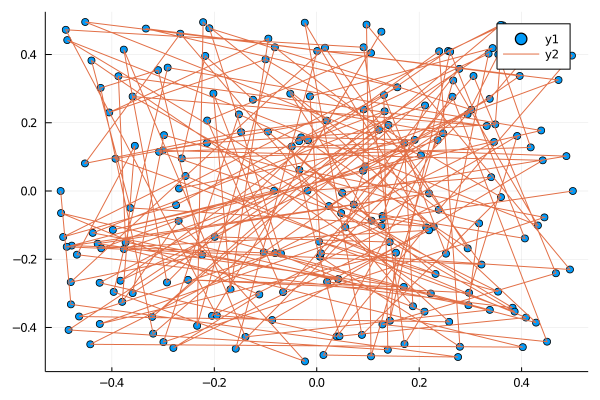

In [74]:
param_2D["n_plac"]= 200
chain = rand(param_2D["n_plac"],3).-0.5;
chain[1,:] = [-0.5, 0., 0.5]
vf = 0.5
chain[param_2D["n_plac"],:] = [vf, 0, 0.5]
scatter(chain[:,1], chain[:, 2])
plot!(chain[:,1], chain[:, 2])

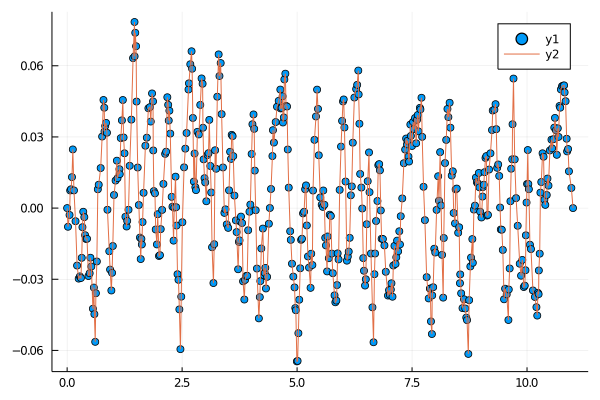

In [106]:
param_2D["d_rest"] = 0.001 * [1., 1.] + 0.001*[0., 1.]
param_2D["temperature"] =0.0002
param_2D["lenght"]=0.08
param_2D["step"]= 1. * [0.1, 0.1, 0.1]
for j = 1:1000
    for i = 2:(param_2D["n_plac"]-1)
        element_progress_2D(chain, rand(2:(param_2D["n_plac"]-1)) , param_2D)
        element_progress_2D(chain, i , param_2D)
    end
end
scatter(chain[:,1], chain[:, 2])
plot!(chain[:,1], chain[:, 2])


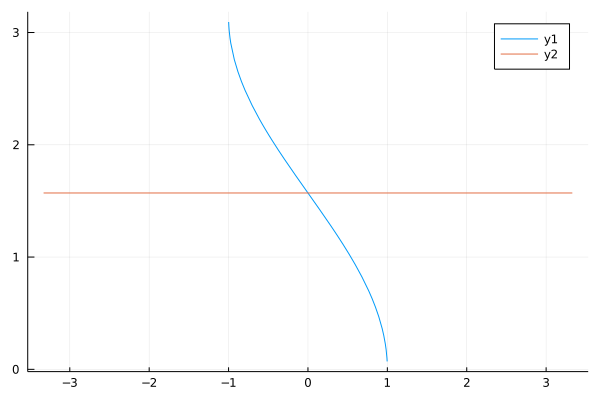

In [101]:
plot(x->acos(x), -pi, pi)
plot!(x-> pi/2)

In [143]:
x = [0., 0., 0.]
y = [1., 0.3, 0.1]
mu = 1.
alpha = 0.1
dist = y[1:2] - x[1:2] 
theta_dist = acos(dist[1]/norm(dist))* sign(dist[2])
energy = [(norm(dist)- mu)^2 , (theta_dist- x[3] - alpha)^2 , (y[3]- theta_dist- alpha)^2]

3-element Array{Float64,1}:
 0.0019386982178899684
 0.03665570415174035
 0.08494706304731382

In [146]:
a=true
typeof(a)

Bool

In [133]:
?norm

search: normpath normalize_hue issubnormal set_zero_subnormals

Couldn't find norm
Perhaps you meant Core, rm, sort, xor, for, ntoh, ndims, new, Enum, one or font


No documentation found.

Binding `norm` does not exist.


In [135]:
using Pkg

In [137]:
Pkg.add("LinearAlgebra")

   Updating registry at `~/.julia/registries/General`
--2021-04-04 16:22:39--  https://pkg.julialang.org/registry/23338594-aafe-5451-b93e-139f81909106/feea2b255144d5d10df1d84e5a3b19b9d5e1d98b
Resolving pkg.julialang.org (pkg.julialang.org)... 151.101.114.217, 2a04:4e42:39::729
Connecting to pkg.julialang.org (pkg.julialang.org)|151.101.114.217|:443... connected.
HTTP request sent, awaiting response... 301 EU internal redirect trigger
Location: https://eu-central.pkg.julialang.org/registry/23338594-aafe-5451-b93e-139f81909106/feea2b255144d5d10df1d84e5a3b19b9d5e1d98b [following]
--2021-04-04 16:22:39--  https://eu-central.pkg.julialang.org/registry/23338594-aafe-5451-b93e-139f81909106/feea2b255144d5d10df1d84e5a3b19b9d5e1d98b
Resolving eu-central.pkg.julialang.org (eu-central.pkg.julialang.org)... 18.157.163.169
Connecting to eu-central.pkg.julialang.org (eu-central.pkg.julialang.org)|18.157.163.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2963952 (2,8M) [

In [138]:
using LinearAlgebra

In [142]:
norm([3., 4.])

5.0